In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Survey data

The data is collected using google forms to identify the mental pattern among people so that we can derive at better conclusions for the problem statement that helps in satisfying the user needs

In [3]:
data = pd.read_csv("Mental Health Survey (Responses).csv")

In [4]:
data.head()

,Timestamp,Age,Gender,"In the past month, have you felt sad or down more often than usual?",Have you been experiencing difficulty sleeping or sleeping too much lately?,Have you had thoughts of harming yourself or others?,Do you feel like you have support from friends or family when you need it?,Do you feel like you are able to manage your stress levels effectively?,What activities do you find help you to relax and de-stress?,Are you able to take regular breaks throughout the day to give your mind and body a chance to rest?,How much do you rate your mental stability?,Your current mental state
0,3/28/2023 15:00:40,20-30,Female,Yes,Yes,No,Yes,No,Playing Games,Yes,3,Stressful/Depressed
1,3/28/2023 15:00:49,20-30,Female,Yes,Yes,No,Yes,Yes,Talking with someone,No,3,Stressful/Depressed
2,3/28/2023 15:02:31,20-30,Male,Yes,Yes,Yes,Yes,No,Playing Games,Yes,3,Stable
3,3/28/2023 15:06:31,20-30,Female,Yes,Yes,Yes,Yes,Yes,Talking with someone,Yes,3,Stable
4,3/28/2023 15:06:54,20-30,Male,Yes,No,No,Yes,Yes,Playing Games,Yes,3,Stable


# Renaming the columns for better access


In [5]:
data.columns=['Timestamp','Age','Gender','pastmonth_down', 'sleep_diff', 'harmful_thought', 'friends/family_help', 'manage_effectively', 'activity','rest', 'mental_stability', 'current_state']


In [6]:
data.head()

,Timestamp,Age,Gender,pastmonth_down,sleep_diff,harmful_thought,friends/family_help,manage_effectively,activity,rest,mental_stability,current_state
0,3/28/2023 15:00:40,20-30,Female,Yes,Yes,No,Yes,No,Playing Games,Yes,3,Stressful/Depressed
1,3/28/2023 15:00:49,20-30,Female,Yes,Yes,No,Yes,Yes,Talking with someone,No,3,Stressful/Depressed
2,3/28/2023 15:02:31,20-30,Male,Yes,Yes,Yes,Yes,No,Playing Games,Yes,3,Stable
3,3/28/2023 15:06:31,20-30,Female,Yes,Yes,Yes,Yes,Yes,Talking with someone,Yes,3,Stable
4,3/28/2023 15:06:54,20-30,Male,Yes,No,No,Yes,Yes,Playing Games,Yes,3,Stable


# Identifying number of unique values in each column

In [7]:
data.nunique()

Timestamp              55
Age                     3
Gender                  2
pastmonth_down          2
sleep_diff              2
harmful_thought         2
friends/family_help     2
manage_effectively      2
activity                3
rest                    2
mental_stability        5
current_state           3
dtype: int64

In [8]:
data.dtypes

Timestamp              object
Age                    object
Gender                 object
pastmonth_down         object
sleep_diff             object
harmful_thought        object
friends/family_help    object
manage_effectively     object
activity               object
rest                   object
mental_stability        int64
current_state          object
dtype: object

# Checking for null values

Here there is no null vales present in the dataset

<Axes: >

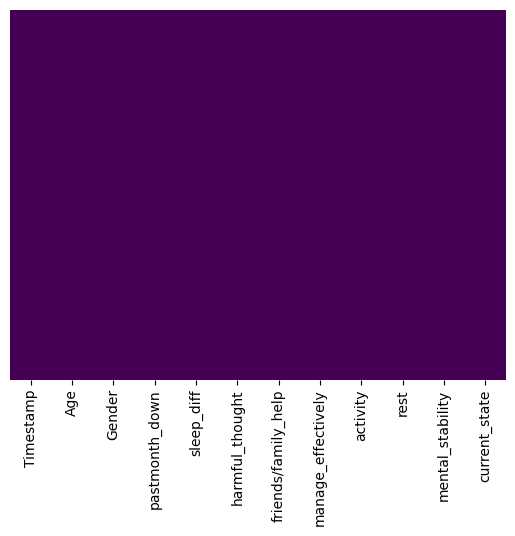

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data.shape

(110, 12)

# Encoding

Here the yes values are replaced by 1 and No with 0

In [11]:
binary_col=['pastmonth_down','sleep_diff','harmful_thought','friends/family_help','manage_effectively','rest']
data[binary_col] = data[binary_col].applymap(lambda x: 1 if x == 'Yes' else 0)

In [12]:
data.head()

,Timestamp,Age,Gender,pastmonth_down,sleep_diff,harmful_thought,friends/family_help,manage_effectively,activity,rest,mental_stability,current_state
0,3/28/2023 15:00:40,20-30,Female,1,1,0,1,0,Playing Games,1,3,Stressful/Depressed
1,3/28/2023 15:00:49,20-30,Female,1,1,0,1,1,Talking with someone,0,3,Stressful/Depressed
2,3/28/2023 15:02:31,20-30,Male,1,1,1,1,0,Playing Games,1,3,Stable
3,3/28/2023 15:06:31,20-30,Female,1,1,1,1,1,Talking with someone,1,3,Stable
4,3/28/2023 15:06:54,20-30,Male,1,0,0,1,1,Playing Games,1,3,Stable


The remaining columns are encoded using Label encoding

Age           : 20_30-0,
                30_40-1,
                above 40-2

Gender        : Male-0,
                Female-1

Activity      : Playing games-0,
                Talking with someone-1,
                Reading books-2

Current_status: Sressful/depressed-0,
                Stable-1,
                Joyful-2
          

In [13]:
from sklearn.preprocessing import LabelEncoder

cat_cols=['Age','Gender','activity','current_state']

# instantiate the LabelEncoder
le = LabelEncoder()


# encode all columns in the dataframe
data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))


In [14]:
data.head()

,Timestamp,Age,Gender,pastmonth_down,sleep_diff,harmful_thought,friends/family_help,manage_effectively,activity,rest,mental_stability,current_state
0,3/28/2023 15:00:40,0,0,1,1,0,1,0,0,1,3,2
1,3/28/2023 15:00:49,0,0,1,1,0,1,1,2,0,3,2
2,3/28/2023 15:02:31,0,1,1,1,1,1,0,0,1,3,1
3,3/28/2023 15:06:31,0,0,1,1,1,1,1,2,1,3,1
4,3/28/2023 15:06:54,0,1,1,0,0,1,1,0,1,3,1


In [15]:
data.dtypes

Timestamp              object
Age                     int64
Gender                  int64
pastmonth_down          int64
sleep_diff              int64
harmful_thought         int64
friends/family_help     int64
manage_effectively      int64
activity                int64
rest                    int64
mental_stability        int64
current_state           int64
dtype: object

In [16]:
data=data.drop(['Timestamp'], axis=1)

In [17]:
data.dtypes

Age                    int64
Gender                 int64
pastmonth_down         int64
sleep_diff             int64
harmful_thought        int64
friends/family_help    int64
manage_effectively     int64
activity               int64
rest                   int64
mental_stability       int64
current_state          int64
dtype: object

# Checking for outliers

Here the dataset contains no outliers

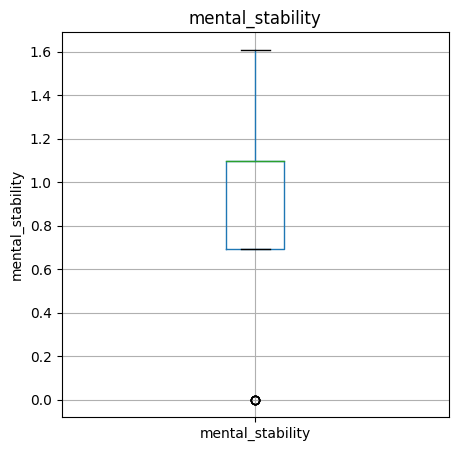

In [18]:
for feature in data:
    if 0 in data[feature].unique():
        pass
    else:
        fig = plt.figure(figsize=(5,5))
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        print("\n")
        

# Exploratory Data Analysis

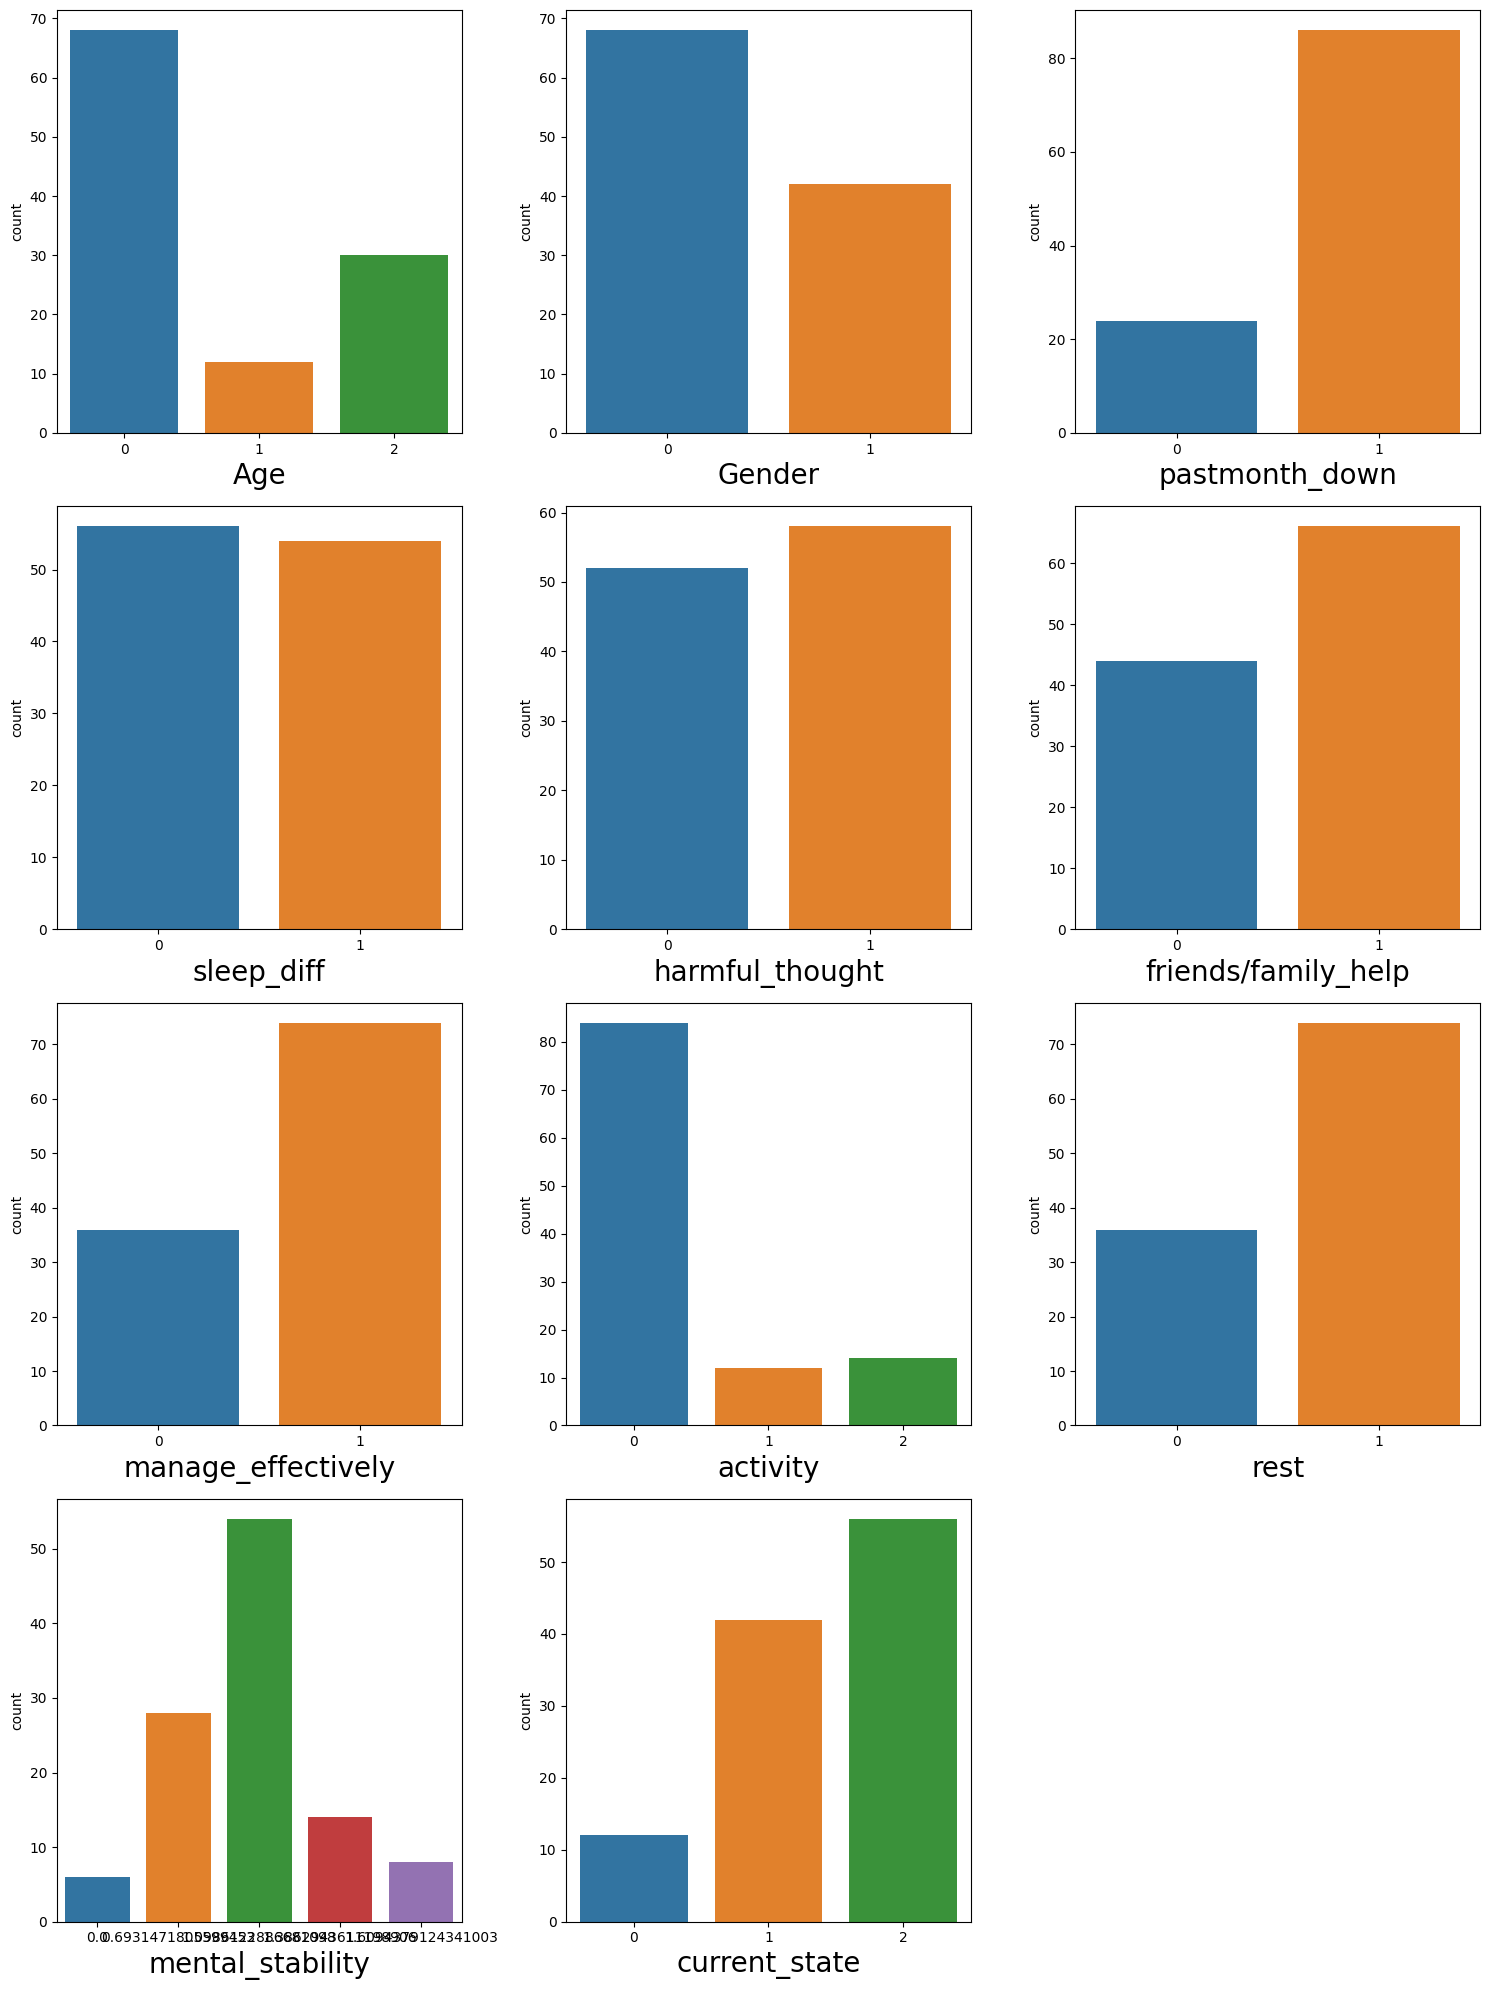

In [19]:
plt.figure(figsize=(15,20)) # defining canvas size
plotno = 1 # counter

for column in data: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=data[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 



*   The first plot shows the people of different age group and most respondents are in the age group of 20 to 30

*   The second plot shows the frequency of male and female respondents

*   The third plot shows the past month mental experience and from this it is identified that most of the people felt dowm or sad during the past month

*   The fouth plot talks about the sleep difficulties and both types of people are equallsy distributed

*   The fifth plot tells about the harmful thoughts and people epericing those traume are slightly hih which is a serious issue to talk upon if not which may harm them or the others

*   From the 6th plot it is identified that people are able to get friends and family help whenever they need it

*   From the 7th plot is is evident that most of the people are able to manage their time properly

*   The 8th plot tells about which activities helps in reducing the stress significantly **Here it is identified that about 73% of the respondends feels that paying games reduce their stress significantly, Hence we developed stress buster**

*   The 9th plot tells that people were able to take breaks and rest at appropriate time

*   The 10th plot shows the mental stability rating of user and most if them found their mental strenght as average that is 3

*   The 11th plot shows the current mental state of the respondents and it is found that most(55%) of the people have stressful/depressed mindset